# Sales Analysis

#### Import necessary libraries and  Merge data from each month into one CSV

In [1]:
import os
import pandas as pd

# Define the directory containing the sales data
directory = r"C:\Users\sk khadir\Desktop\jupyter lab\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

# Initialize an empty DataFrame to hold all the data
all_data = pd.DataFrame()

# Loop through each file in the directory
for file in os.listdir(directory):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(directory, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        all_data = pd.concat([all_data, data])  # Append the data to all_data

# Save the merged data into a single CSV file
output_file = r"C:\Users\sk khadir\Desktop\jupyter lab\Pandas-Data-Science-Tasks-master\SalesAnalysis\Merged_Sales_Data.csv"
all_data.to_csv("output_file.csv", index=False)

print(f"Data merged successfully into {"output_file.csv"}")





Data merged successfully into output_file.csv


#### Read in updated dataframe

In [2]:
all_data=pd.read_csv("output_file.csv")
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/24 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2024 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/24 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [3]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/24 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2024 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/24 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/24 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2024 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/24 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [28]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/24 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2024 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04-12-2024 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/24 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Question 1: What was the best month for sales? How much was earned that month? 

In [14]:


all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

all_data.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

monthly_summary = all_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum'
})


monthly_summary.columns = ['Total Quantity Ordered', 'Total Price Each', 'Total Sales']


monthly_summary.reset_index(inplace=True)

print(monthly_summary)


    Month  Total Quantity Ordered  Total Price Each  Total Sales
0       1                   10903        1811768.38   1822256.73
1       2                   13449        2188884.72   2202022.42
2       3                   17005        2791207.83   2807100.38
3       4                   20558        3367671.02   3390670.24
4       5                   18667        3135125.13   3152606.75
5       6                   15253        2562025.61   2577802.26
6       7                   16072        2632539.56   2647775.76
7       8                   13448        2230345.42   2244467.88
8       9                   13109        2084992.09   2097560.13
9      10                   22703        3715554.83   3736726.88
10     11                   19798        3180600.68   3199603.20
11     12                   28114        4588415.41   4613443.34


range(1, 13)


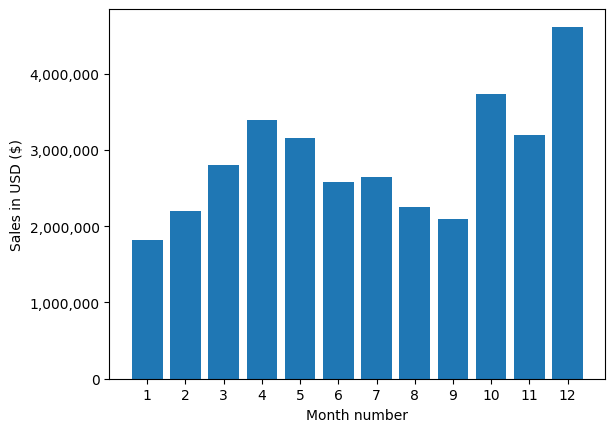

In [17]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

months = range(1, 13)
print(months)

# Group by 'Month' and sum the 'Sales'
monthly_sales = all_data.groupby(['Month']).sum()['Sales']

# Plotting the bar chart
plt.bar(months, monthly_sales)

# Format the y-axis to show values like 1,000,000 instead of 1e6
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Set labels and title
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

# Show the plot
plt.show()


#### Question 2: What city sold the most product?

In [19]:
# Group by 'City' and sum only numeric columns
city_sales = all_data.groupby('City').sum(numeric_only=True)[['Quantity Ordered', 'Price Each']]
city_sales['Sales'] = city_sales['Quantity Ordered'] * city_sales['Price Each']

# Display the result
print(city_sales[['Quantity Ordered', 'Price Each', 'Sales']])


                     Quantity Ordered  Price Each         Sales
City                                                           
Atlanta  (GA)                   16602  2779908.20  4.615204e+10
Austin  (TX)                    11153  1809873.61  2.018552e+10
Boston  (MA)                    22528  3637409.77  8.194357e+10
Dallas  (TX)                    16730  2752627.82  4.605146e+10
Los Angeles  (CA)               33289  5421435.23  1.804742e+11
New York City  (NY)             27932  4635370.83  1.294752e+11
Portland  (ME)                   2750   447189.25  1.229770e+09
Portland  (OR)                  11303  1860558.22  2.102989e+10
San Francisco  (CA)             50239  8211461.74  4.125356e+11
Seattle  (WA)                   16553  2733296.01  4.524425e+10


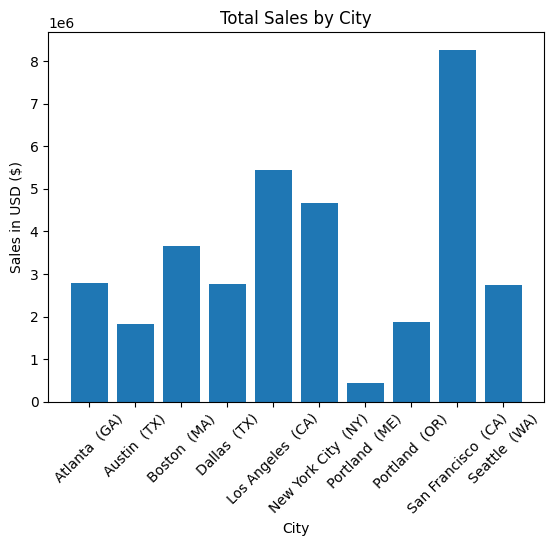

In [27]:
import matplotlib.pyplot as plt

# Group by 'City' and calculate the total sales
city_sales = all_data.groupby('City').sum()['Sales']

# Extract city names (as strings) and sales values
keys = city_sales.index.tolist()  # List of city names
sales = city_sales.values.tolist()  # List of sales values

# Plot the bar chart
plt.bar(keys, sales)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Total Sales by City')
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [32]:

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')  # Handle mixed formats
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1

# Display the updated dataframe
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2024-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2024-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2024-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2024-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2024-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


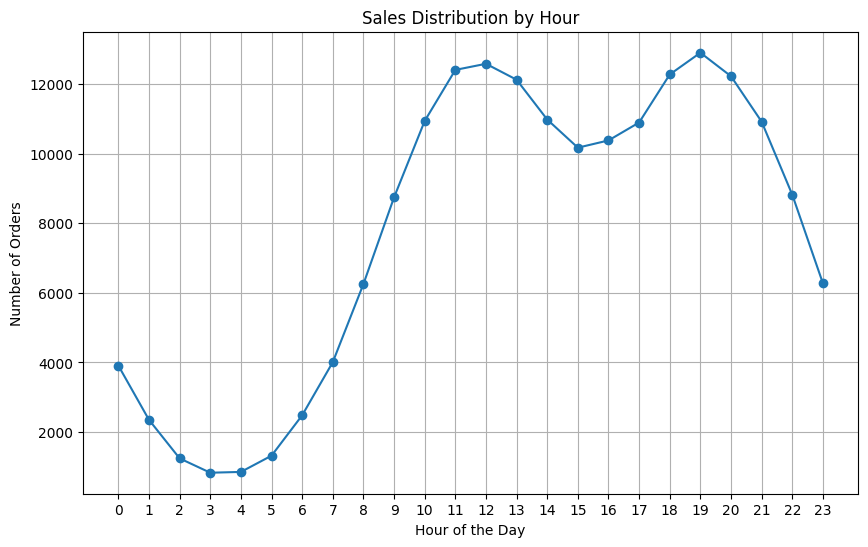

In [33]:
import matplotlib.pyplot as plt

# Ensure 'Hour' column exists
if 'Hour' not in all_data.columns:
    all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

# Generate the keys (unique hours)
keys = all_data['Hour'].unique()

# Sort keys to ensure correct order on the x-axis
keys = sorted(keys)

# Count the number of occurrences for each hour
hourly_counts = all_data.groupby('Hour').size()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(keys, hourly_counts, marker='o')
plt.xticks(keys)
plt.title('Sales Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()



#### Question 4: What products are most often sold together?

In [34]:
# Select rows where 'Order ID' appears more than once
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Group products by 'Order ID'
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate rows
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


In [35]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

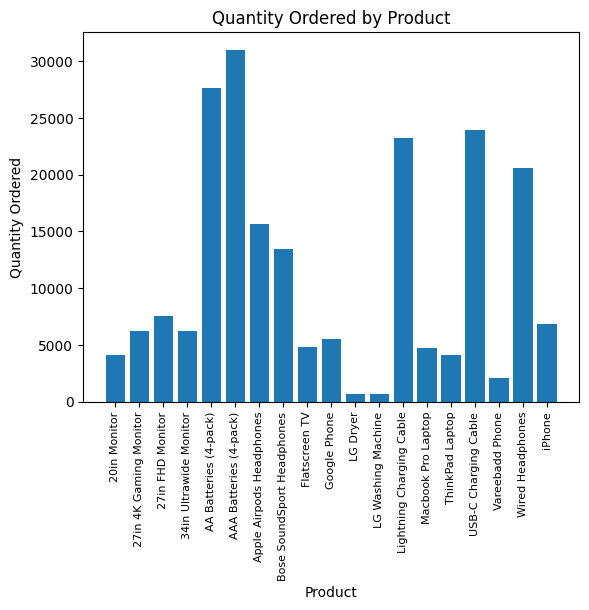

In [36]:
# Group by product and sum the 'Quantity Ordered' column
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Get product names (keys) for the x-axis
keys = quantity_ordered.index

# Plot the data
import matplotlib.pyplot as plt

plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Quantity Ordered by Product')
plt.show()


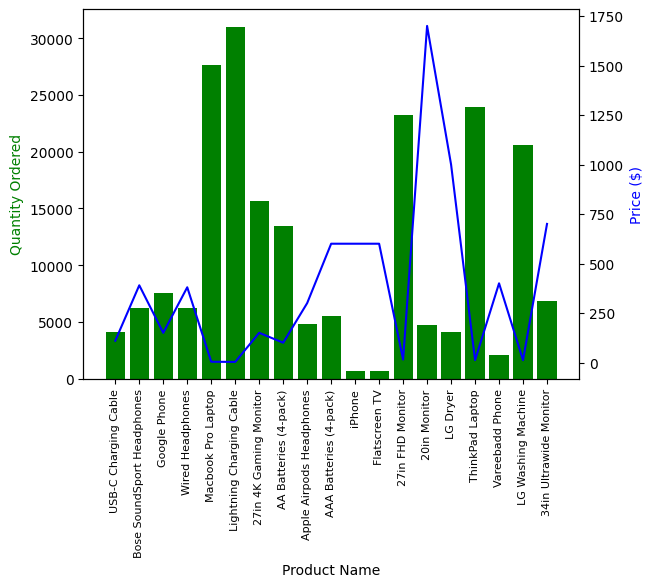

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean the data
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data = all_data.dropna(subset=['Price Each'])

# Calculate the mean prices
prices = all_data.groupby('Product')['Price Each'].mean()

# Visualization
keys = all_data['Product'].unique()  # Assuming these are the product names
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Bar and line plot
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

# Set labels and ticks
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(range(len(keys)))  # Set the tick positions
ax1.set_xticklabels(keys, rotation='vertical', size=8)  # Set tick labels

# Show the plot
plt.show()

